## Happy Customers

---

**Background:**
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. From operational standpoint we have been facing several different challenges and everyday we are trying to address these challenges.
We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.
Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.
We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

**Data Description:**

    Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
    X1 = my order was delivered on time
    X2 = contents of my order was as I expected
    X3 = I ordered everything I wanted to order
    X4 = I paid a good price for my order
    X5 = I am satisfied with my courier
    X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

**Goal(s):**

Predict if a customer is happy or not based on the answers they give to questions asked.
Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.
Try to submit your working solution as soon as possible. The sooner the better.

**Bonus(es):**

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey? 

----

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [11]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


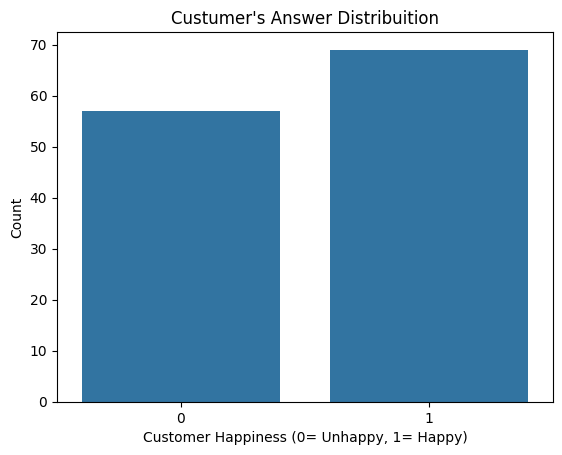

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Y', data=df)
plt.title("Custumer's Answer Distribuition")
plt.xlabel("Customer Happiness (0= Unhappy, 1= Happy)")
plt.ylabel("Count")
plt.show()

In [14]:
rows = df.shape[0]
print(f'Class\t\t\trows\t%\nPossitive(1 = Happy)  \t{df[df['Y']==1].shape[0]} \t{(100*df[df['Y']==1].shape[0]/rows):.1f}')
print(f'Negative(0 = Unhappy)\t{df[df['Y']==0].shape[0]} \t{(100*df[df['Y']==0].shape[0]/rows):.1f}')

Class			rows	%
Possitive(1 = Happy)  	69 	54.8
Negative(0 = Unhappy)	57 	45.2


In [17]:
features = [ 'X' + str(i) for i in range(1,7,1)]


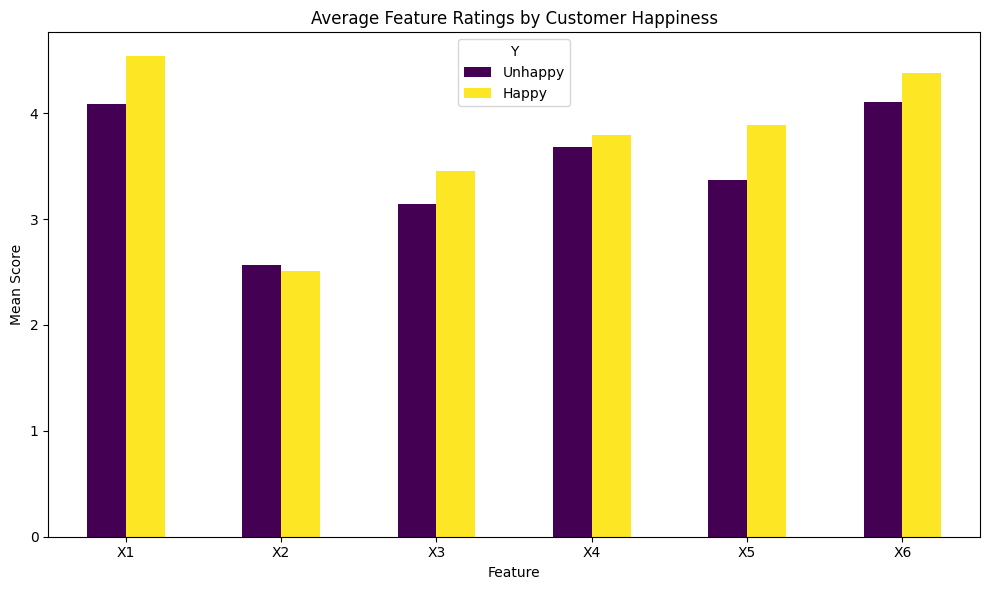

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

means = df.groupby('Y')[features].mean().T
means.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Feature Ratings by Customer Happiness')
plt.ylabel('Mean Score')
plt.xlabel('Feature')
plt.xticks(rotation=0)
plt.legend(title='Y', labels=['Unhappy', 'Happy'])
plt.tight_layout()
plt.show()

##### X1 = my order was delivered on time
##### X2 = contents of my order was as I expected
##### X3 = I ordered everything I wanted to order
##### X4 = I paid a good price for my order
##### X5 = I am satisfied with my courier
##### X6 = the app makes ordering easy for me

In [22]:
df.groupby('Y').mean()

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


In [24]:
df.groupby('Y').std()

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
1,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908


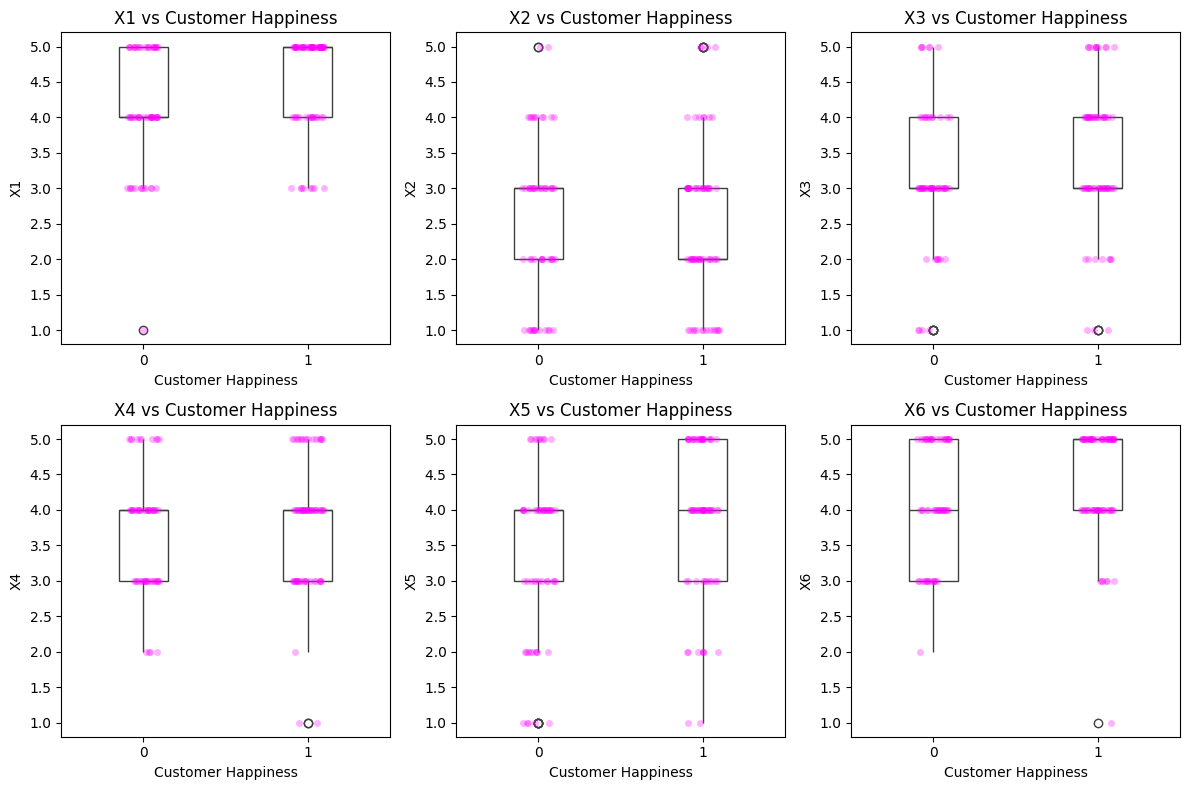

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Y', y=col, data=df, ax=axes[i],
                width=0.3, showcaps=False,
                boxprops={'facecolor': 'None'})
    sns.stripplot(x='Y', y=col, data=df,
                  ax=axes[i], size=5, color='magenta', alpha=.3)
    axes[i].set_title(f'{col} vs Customer Happiness')
    axes[i].set_xlabel('Customer Happiness')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [27]:
print(df.duplicated().sum())

16


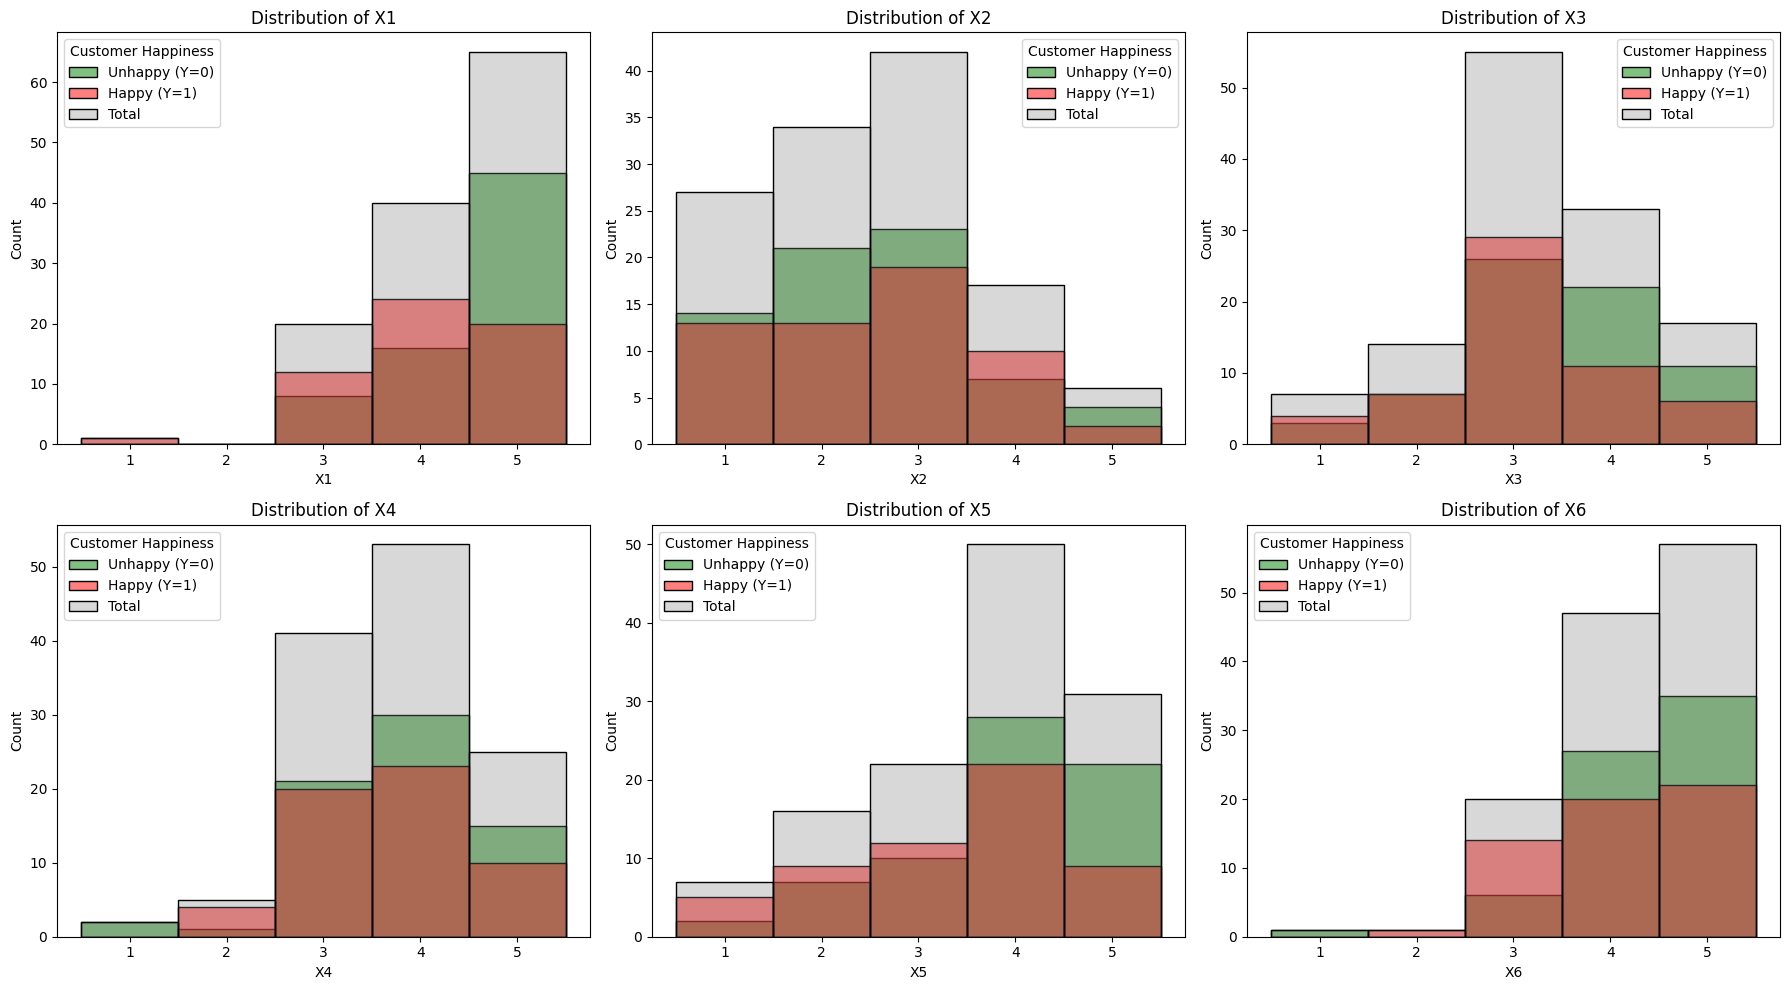

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(data=df, x=col, hue='Y', multiple='layer',
                 palette={0: 'red', 1: 'green'}, edgecolor='black',
                 stat='count', common_bins=True, bins=5, discrete=True, ax=axes[i])

    sns.histplot(data=df, x=col, color='gray', bins=5, discrete=True,
                 stat='count', edgecolor='black', label='Total', ax=axes[i], alpha=0.3)

    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend(title='Customer Happiness', labels=['Unhappy (Y=0)', 'Happy (Y=1)', 'Total'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


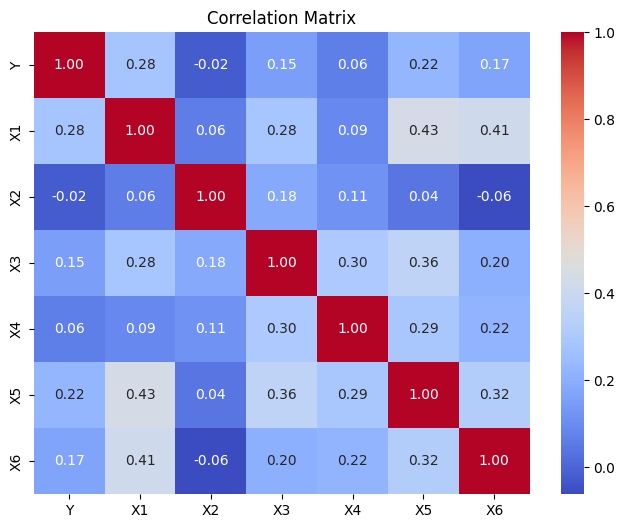

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Exploratory data analysis showed that:

    The dataset contains only 126 samples, which limits generalization.

    Class balance is roughly even.

    Correlation analysis revealed that the most predictive features were:

        X1 – On-time delivery (0.28)

        X5 – Courier satisfaction (0.22)

        X6 – App usability (0.17)

    X2 and X4 showed very low or negative correlation with the target, suggesting limited predictive value.

----

# Experimenting with Prediction Models

In [36]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Y']
# Split the sets using stratify because of the class imbalance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [38]:
print(f'Train set class balance. \nSet\tPossitive\tNegattive\nTrain \t{100*y_train[y_train == 1].shape[0] / y_train.shape[0]} %\t\t {100*y_train[y_train == 0].shape[0] / y_train.shape[0]}%')
print(f'Test \t{(100*y_test[y_test == 1].shape[0] / y_test.shape[0]):.1f} %\t\t {(100*y_test[y_test == 0].shape[0] / y_test.shape[0]):.1f}%')

Train set class balance. 
Set	Possitive	Negattive
Train 	55.0 %		 45.0%
Test 	53.8 %		 46.2%


#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [44]:
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_LR), 2))
print(classification_report(y_test, y_pred_LR))

Logistic Regression Accuracy: 0.38
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.40      0.29      0.33        14

    accuracy                           0.38        26
   macro avg       0.39      0.39      0.38        26
weighted avg       0.39      0.38      0.38        26



### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)


In [49]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.538
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.62      0.36      0.45        14

    accuracy                           0.54        26
   macro avg       0.56      0.55      0.53        26
weighted avg       0.57      0.54      0.52        26



### XGBoost

In [52]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=23
)

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


In [54]:
print("XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 3))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.55      0.43      0.48        14

    accuracy                           0.50        26
   macro avg       0.51      0.51      0.50        26
weighted avg       0.51      0.50      0.50        26



## Observation: 
**The target accuracy of 73% is significantly higher than the results obtained using popular classification models. To close this gap, we will experiment with feature engineering techniques.**


---

## Feature Engineering

#### Combine X1, X5 and X6 (strongest contributor features)

In [60]:
df['X_1_5_6'] = df[['X1', 'X5', 'X6']].mean(axis=1)

In [62]:
df['X_1_5_6_weighted'] = (0.5 * df['X1'] + 0.3 * df['X5'] + 0.2 * df['X6'])

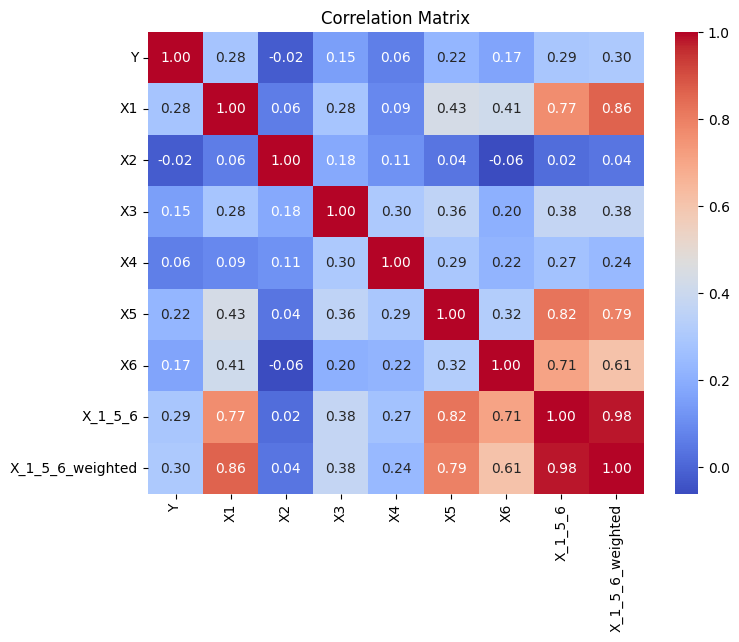

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [65]:
features += ['X_1_5_6_weighted']
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [68]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [70]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.577
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.64      0.50      0.56        14

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.59      0.58      0.58        26



#### Binary Flag: Extremely Good or Bad Scores

In [73]:
for col in ['X1', 'X5', 'X6']:
    df[f'{col}_is_5'] = (df[col] == 5).astype(int)
    df[f'{col}_is_1'] = (df[col] == 1).astype(int)

In [75]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X_1_5_6,X_1_5_6_weighted,X1_is_5,X1_is_1,X5_is_5,X5_is_1,X6_is_5,X6_is_1
0,0,3,3,3,4,2,4,3.000000,2.9,0,0,0,0,0,0
1,0,3,2,3,5,4,3,3.333333,3.3,0,0,0,0,0,0
2,1,5,3,3,3,3,5,4.333333,4.4,1,0,0,0,1,0
3,0,5,4,3,3,3,5,4.333333,4.4,1,0,0,0,1,0
4,0,5,4,3,3,3,5,4.333333,4.4,1,0,0,0,1,0


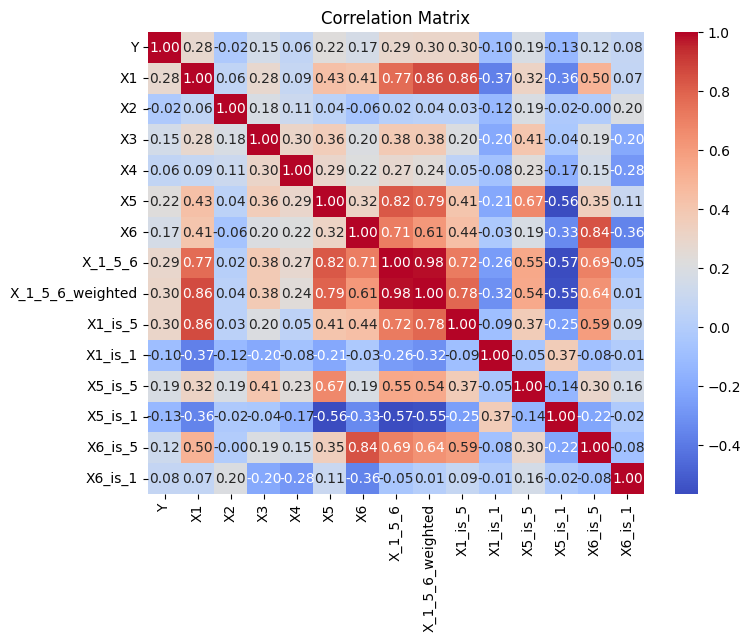

In [77]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [78]:
features += ['X1_is_5', 'X1_is_1', 'X5_is_5', 'X5_is_1', 'X6_is_5', 'X6_is_1']
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [81]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [83]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.615
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.70      0.50      0.58        14

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.64      0.62      0.61        26



#### Drop Low-Correlation Features

In [86]:
X = df.drop(columns=['X2', 'X4'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [90]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [92]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.962
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Y                 126 non-null    int64  
 1   X1                126 non-null    int64  
 2   X3                126 non-null    int64  
 3   X5                126 non-null    int64  
 4   X6                126 non-null    int64  
 5   X_1_5_6           126 non-null    float64
 6   X_1_5_6_weighted  126 non-null    float64
 7   X1_is_5           126 non-null    int64  
 8   X1_is_1           126 non-null    int64  
 9   X5_is_5           126 non-null    int64  
 10  X5_is_1           126 non-null    int64  
 11  X6_is_5           126 non-null    int64  
 12  X6_is_1           126 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 12.9 KB


## Feature Importance
Using Random Forest, feature importances, and correlation-based analysis, we concluded that:

Most important features:

  **X1** (On-time delivery)
  
  **X5** (Courier satisfaction)
  
  **X6** (App usability)

Least important features:

   **X2** (Contents as expected)
   
   **X4** (Price satisfaction)
   
**These could be considered for removal in future surveys without significant loss in predictive power.**

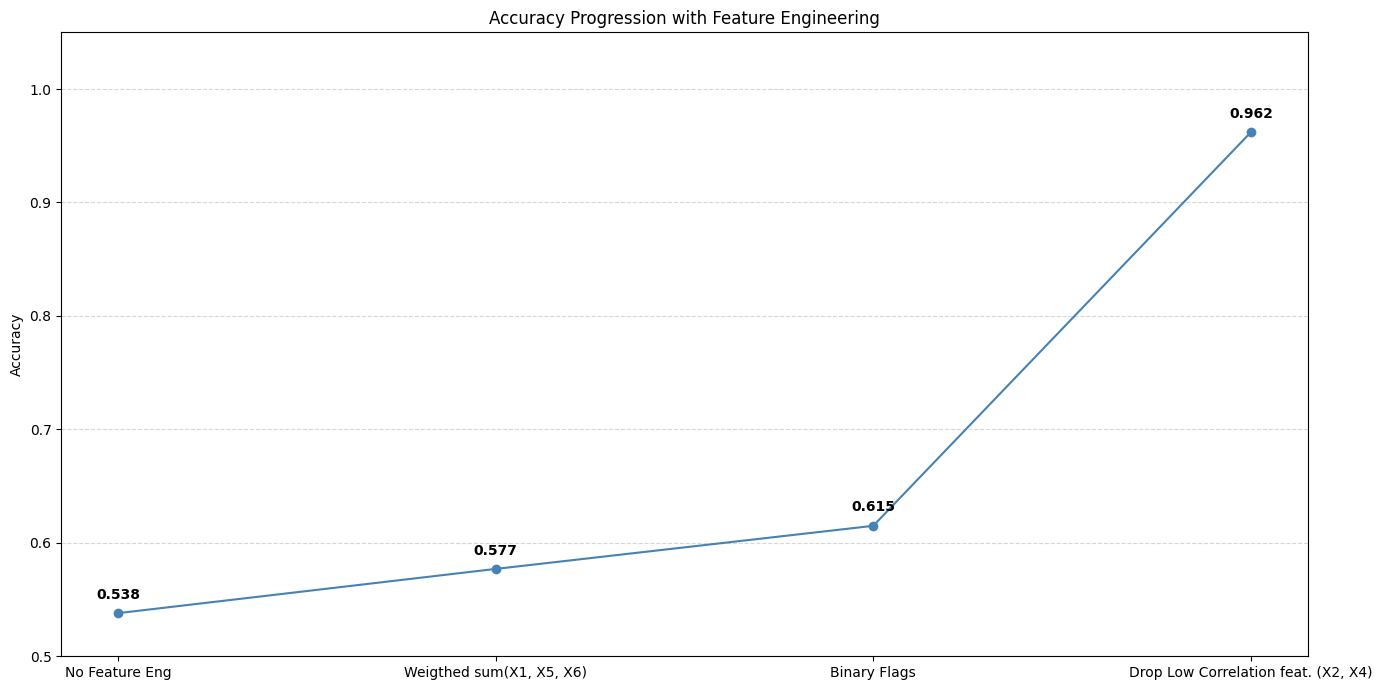

In [97]:
score_progression = [.538, .577, .615, .962]
feature_eng = ['No Feature Eng', 'Weigthed sum(X1, X5, X6)', 'Binary Flags', 'Drop Low Correlation feat. (X2, X4)']
plt.figure(figsize=(14,7))
plt.plot(feature_eng, score_progression, marker='o', linestyle='-', color='steelblue')
# Add point labels
for i, score in enumerate(score_progression):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Accuracy Progression with Feature Engineering")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### We visualized how accuracy improved step by step as feature engineering evolved. Notably, the final boost came when we dropped the low-correlation features X2 and X4, leading to a dramatic leap in accuracy, effectively unlocking the model’s full predictive potential. This highlights the importance of eliminating weak or noisy signals when working with compact, structured data.